In [ ]:
!pip install yfinance
!pip install ta
!pip install mpl_finance
!pip install mplfinance

  Preparing metadata (setup.py) ... done
  Created wheel for ta: filename=ta-0.10.2-py3-none-any.whl size=29088 sha256=7cdcb634bcd88685947083727d3f1441476d6449130e622a9d0dfc5bb1673ed9
  Stored in directory: /root/.cache/pip/wheels/47/51/06/380dc516ea78621870b93ff65527c251afdfdc5fa9d7f4d248
Successfully built ta
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 73.1/73.1 kB 3.1 MB/s eta 0:00:00


In [ ]:
import pandas as pd
import numpy as np
import yfinance
import ta
from mpl_finance import candlestick_ohlc
import matplotlib.dates as mpl_dates
import mplfinance as mpf
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [15, 7]
plt.rc('font', size=14)

In [ ]:
name = '^NSEI'
ticker = yfinance.Ticker(name)
df = ticker.history(interval="1d",start="2022-07-02", end="2023-07-12")
df['Date'] = pd.to_datetime(df.index)
df['Date'] = df['Date'].apply(mpl_dates.date2num)
df = df.loc[:,['Date', 'Open', 'High', 'Low', 'Close']]

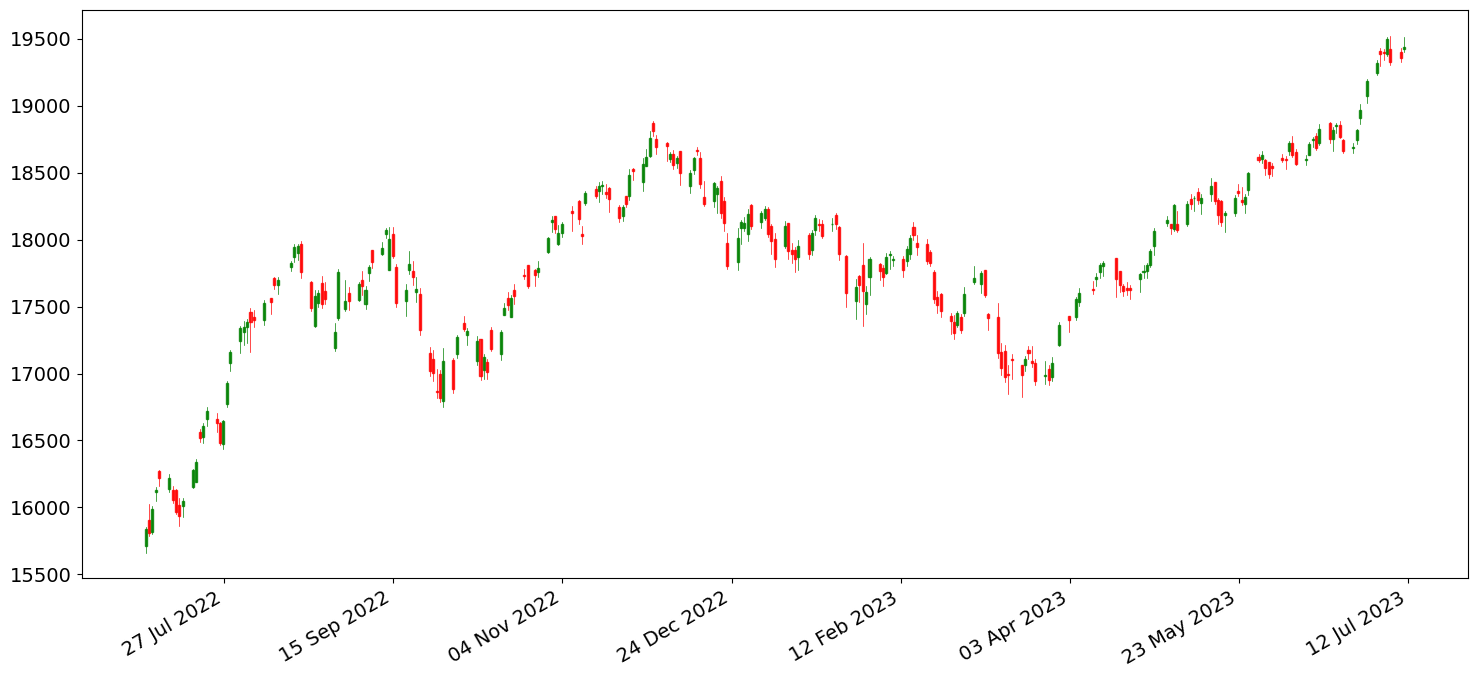

In [ ]:
def plot_all():
  fig, ax = plt.subplots()
  candlestick_ohlc(ax,df.values,width=0.6, \
                   colorup='green', colordown='red', alpha=0.8)
  date_format = mpl_dates.DateFormatter('%d %b %Y')
  ax.xaxis.set_major_formatter(date_format)
  fig.autofmt_xdate()
  fig.tight_layout()
  fig.show()

plot_all()

In [ ]:
df['SMA'] = df['Close'].rolling(window = 10).mean()     #Simple Moving Average calculation (period = 20)
df['stdev'] = df['Close'].rolling(window = 10).std()    #Standard Deviation calculation
df['Lower_Bollinger'] = df['SMA'] - (2 * df['stdev'])   #Calculation of the lower curve of the Bollinger Bands
df['Upper_Bollinger'] = df['SMA'] + (2 * df['stdev'])   #Upper curve

df['TR'] = abs(df['High'] - df['Low'])      #True Range calculation
df['ATR'] = df['TR'].rolling(window = 10).mean()    #Average True Range

df['Upper_KC'] = df['SMA'] + (2 * df['ATR'])      #Upper curve of the Keltner Channel
df['Lower_KC'] = df['SMA'] - (2 * df['ATR'])      #Lower curve



In [ ]:
def in_consolidation(df):       #function testing if a symbol is consolidating (Bollinger Bands in Keltner Channel)
  return df['Lower_Bollinger'] > df['Lower_KC'] and df['Upper_Bollinger'] < df['Upper_KC']
df['consolidation'] = df.apply(in_consolidation, axis = 1)

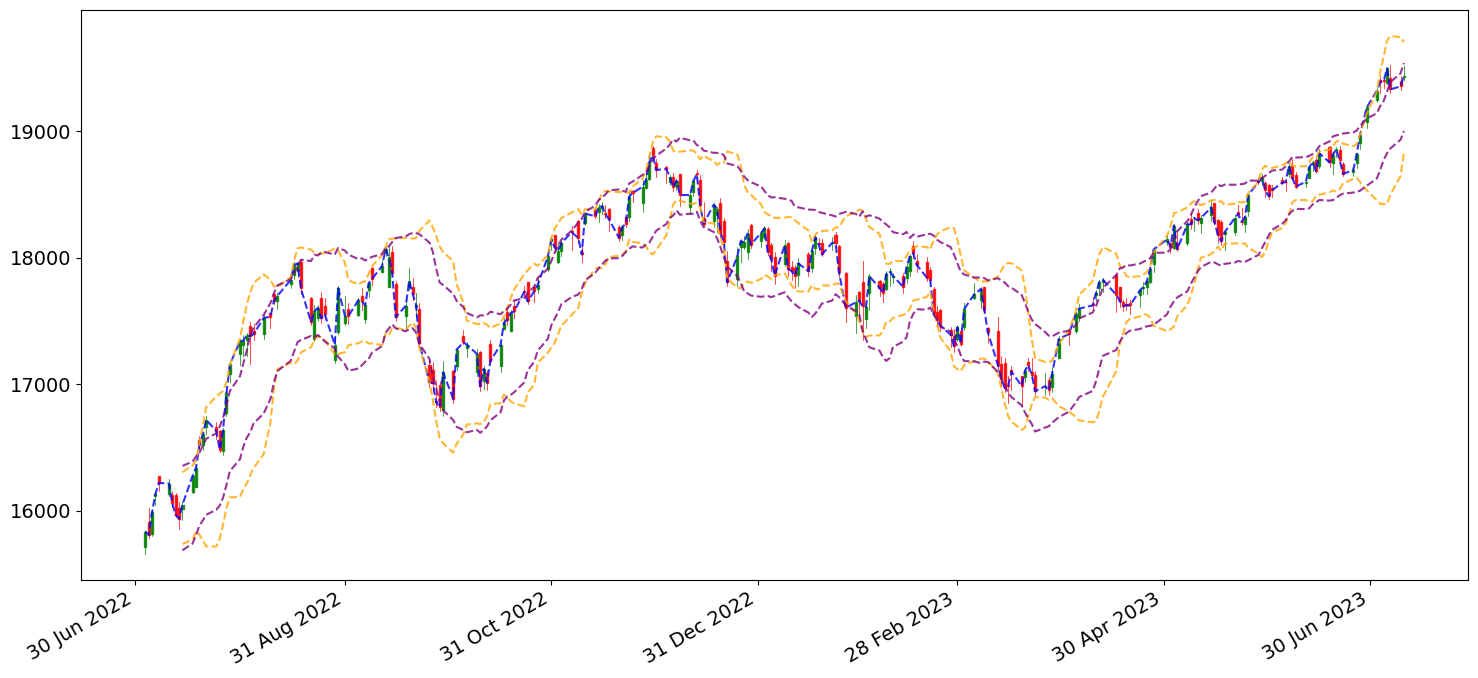

In [ ]:
import matplotlib.pyplot as plt
import mplfinance as mpf

def plot_all():
    fig, ax = plt.subplots()
    candlestick_ohlc(ax, df.values, width=0.6, colorup='green', colordown='red', alpha=0.8)
    date_format = mpl_dates.DateFormatter('%d %b %Y')
    ax.xaxis.set_major_formatter(date_format)

    ax.plot(df['Close'], color='blue', linestyle='dashed', alpha=0.8)
    ax.plot(df['Upper_Bollinger'], color='orange', linestyle='dashed', alpha=0.8)
    ax.plot(df['Lower_Bollinger'], color='orange', linestyle='dashed', alpha=0.8)
    ax.plot(df['Upper_KC'], color='purple', linestyle='dashed', alpha=0.8)
    ax.plot(df['Lower_KC'], color='purple', linestyle='dashed', alpha=0.8)

    ax.autoscale_view()
    fig.autofmt_xdate()
    fig.tight_layout()
    fig.show()
plot_all()